In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [5]:
import requests
import zipfile


# URL of the bank marketing dataset
url = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
zip_file_path = 'bank+marketing.zip'
extracted_folder_path = '/Users/serdarc/Desktop/ml-zoomcamp'

# Step 1: Download the ZIP file if not already downloaded
if not os.path.exists(zip_file_path):
    response = requests.get(url)
    with open(zip_file_path, 'wb') as f:
        f.write(response.content)

# Step 2: Create a folder to extract the zip files
os.makedirs(extracted_folder_path, exist_ok=True)

# Step 3: Extract only the "bank.zip" from the main ZIP
with zipfile.ZipFile(zip_file_path, 'r') as z:
    z.extract('bank.zip', path=extracted_folder_path)

# Step 4: Now extract the contents of the "bank.zip"
bank_zip_path = os.path.join(extracted_folder_path, 'bank.zip')
with zipfile.ZipFile(bank_zip_path, 'r') as bank_zip:
    bank_zip.extractall(extracted_folder_path)

# Step 5: List all the files extracted to check for bank-full.csv
extracted_files = os.listdir(extracted_folder_path)
print(extracted_files)

['bank-names.txt', 'bank.csv', 'laptops.csv', '.DS_Store', 'homework_2.ipynb', 'bank.zip', 'bank+marketing.zip', 'homework_1.ipynb', 'bank-full.csv', 'homework_3.ipynb', '.ipynb_checkpoints', '.git']


In [6]:

# Path to the bank-full.csv file
csv_file_path = os.path.join(extracted_folder_path, 'bank-full.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, delimiter=';')  # Adjust the delimiter if needed

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
columns_to_use = [
    'age', 'job', 'marital', 'education', 'balance', 'housing', 
    'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 
    'previous', 'poutcome', 'y'
]

# Load only the required columns into a DataFrame
df = pd.read_csv(csv_file_path, delimiter=';', usecols=columns_to_use)

df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [11]:

mode_value = df['education'].mode()


print(f"The mode of the 'education' column is: {mode_value[0]}")

The mode of the 'education' column is: secondary


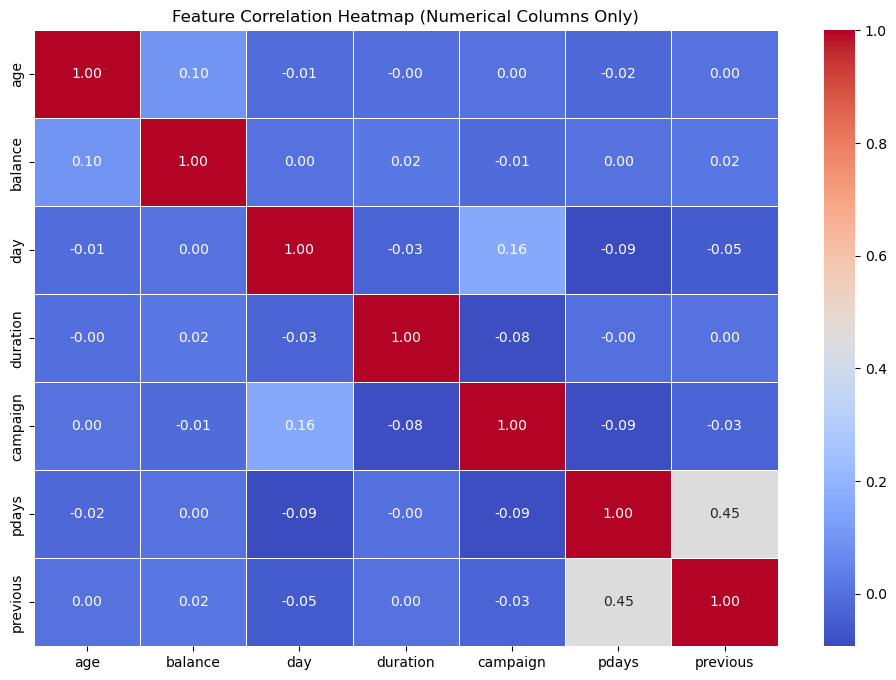

In [12]:
# # This is optional, only numerical features will have correlations
# # You can use label encoding or one-hot encoding for categorical variables
# df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
# df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap (Numerical Columns Only)')
plt.show()

In [13]:
# Question 3
# Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
# Round the scores to 2 decimals using round(score, 2).
# Which of these variables has the biggest mutual information score?

# contact
# education
# housing
# poutcome

In [14]:
# Convert categorical target 'y' to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Select only categorical columns (excluding the target 'y')
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Split the dataset into training and testing sets
X = df[categorical_columns]  # Only categorical features
y = df['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables into numerical values using one-hot encoding or similar (mutual_info_classif requires numerical inputs)
X_train_encoded = pd.get_dummies(X_train)

# Calculate mutual information between y and the categorical variables
mi_scores = mutual_info_classif(X_train_encoded, y_train)

# Create a DataFrame to store the results
mi_scores_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Mutual Information': mi_scores
})

# Round the mutual information scores to 2 decimals
mi_scores_df['Mutual Information'] = mi_scores_df['Mutual Information'].apply(lambda x: round(x, 2))

# Display the mutual information scores
mi_scores_df = mi_scores_df.sort_values(by='Mutual Information', ascending=False)
print(mi_scores_df)

                Feature  Mutual Information
38     poutcome_success                0.03
21     contact_cellular                0.02
20          housing_yes                0.01
13      marital_married                0.01
35            month_sep                0.01
34            month_oct                0.01
32            month_may                0.01
31            month_mar                0.01
23      contact_unknown                0.01
19           housing_no                0.01
16  education_secondary                0.01
39     poutcome_unknown                0.01
12     marital_divorced                0.00
11          job_unknown                0.00
2      job_entrepreneur                0.00
37       poutcome_other                0.00
36     poutcome_failure                0.00
3         job_housemaid                0.00
4        job_management                0.00
33            month_nov                0.00
5           job_retired                0.00
6     job_self-employed         

In [15]:
# Question 4
# Now let's train a logistic regression.
# Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
# Fit the model on the training dataset.
# To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
# model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
# Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [17]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [18]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [19]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [20]:
df.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [21]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [24]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df_cleaned = df.drop(columns=['day', 'month'])

# Step 2: Apply one-hot encoding to categorical columns
categorical_columns = ['job', 'marital', 'education', 'housing', 'contact', 'poutcome']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Step 3: Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['y'])  # Features (exclude the target 'y')
y = df_encoded['y']  # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Model Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Model Accuracy: 89.90%


In [25]:
# Question 5
# Let's find the least useful feature using the feature elimination technique.
# Train a model with all these features (using the same parameters as in Q4).
# Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
# For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
# Which of following feature has the smallest difference?

In [28]:

df_cleaned = df.drop(columns=['day', 'month'])

# Step 2: Apply one-hot encoding to categorical columns
categorical_columns = ['job', 'marital', 'education', 'housing', 'contact', 'poutcome']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Step 3: Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['y'])  # Features (exclude the target 'y')
y = df_encoded['y']  # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the baseline model (with all features)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Get the baseline accuracy
y_pred = model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Accuracy: {baseline_accuracy * 100:.2f}%")

# Step 6: Feature elimination technique - train without one feature at a time
accuracy_differences = {}

for column in X.columns:
    # Drop one feature at a time
    X_train_dropped = X_train.drop(columns=[column])
    X_test_dropped = X_test.drop(columns=[column])
    
    # Train the model again without the feature
    model.fit(X_train_dropped, y_train)
    y_pred_dropped = model.predict(X_test_dropped)
    
    # Get the accuracy without the feature
    accuracy_dropped = accuracy_score(y_test, y_pred_dropped)
    
    # Calculate the difference in accuracy
    accuracy_difference = baseline_accuracy - accuracy_dropped
    accuracy_differences[column] = accuracy_difference
    print(f"Accuracy without '{column}': {accuracy_dropped * 100:.2f}%, Difference: {accuracy_difference:.4f}")

# Step 7: Find the feature with the smallest difference
least_useful_feature = min(accuracy_differences, key=accuracy_differences.get)
print(f"The least useful feature is: {least_useful_feature}")

Baseline Accuracy: 89.90%
Accuracy without 'age': 89.77%, Difference: 0.0013
Accuracy without 'balance': 89.89%, Difference: 0.0001
Accuracy without 'duration': 89.10%, Difference: 0.0081
Accuracy without 'campaign': 89.78%, Difference: 0.0012
Accuracy without 'pdays': 89.89%, Difference: 0.0001
Accuracy without 'previous': 89.88%, Difference: 0.0002
Accuracy without 'job_blue-collar': 89.95%, Difference: -0.0004
Accuracy without 'job_entrepreneur': 89.87%, Difference: 0.0003
Accuracy without 'job_housemaid': 89.84%, Difference: 0.0007
Accuracy without 'job_management': 89.87%, Difference: 0.0003
Accuracy without 'job_retired': 89.86%, Difference: 0.0004
Accuracy without 'job_self-employed': 89.89%, Difference: 0.0001
Accuracy without 'job_services': 89.95%, Difference: -0.0004
Accuracy without 'job_student': 89.87%, Difference: 0.0003
Accuracy without 'job_technician': 89.91%, Difference: -0.0001
Accuracy without 'job_unemployed': 89.94%, Difference: -0.0003
Accuracy without 'job_unkn

In [29]:
# Question 6
# Now let's train a regularized logistic regression.
# Let's try the following values of the parameter C: [0, 0.01, 0.1, 1, 10].
# Train models using all the features as in Q4.
# Calculate the accuracy on the validation dataset and round it to 3 decimal digits.
# # Which of these C leads to the best accuracy on the validation set?

In [33]:
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

C_values = [0.001, 0.01, 0.1, 1, 10]

best_accuracy = 0
best_C = None

for C in C_values:
    # Train the model with the specified value of C
    model = LogisticRegression(C=C, max_iter=1000, solver='liblinear',random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_val, y_pred)
    rounded_accuracy = round(accuracy, 3)
    
    # Print the accuracy for each C value
    print(f"Accuracy with C={C}: {rounded_accuracy}")
    
    # Update the best accuracy and best C if necessary
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C


print(f"The best value for C is {best_C} with an accuracy of {round(best_accuracy, 3)}")

Accuracy with C=0.001: 0.888
Accuracy with C=0.01: 0.897
Accuracy with C=0.1: 0.899
Accuracy with C=1: 0.899
Accuracy with C=10: 0.899
The best value for C is 10 with an accuracy of 0.899
